# Important Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import torch
import torch.nn as nn # neural network
import torch.nn.functional as F
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest, chi2,f_classif,RFE
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Loading Transformed Dataset

In [23]:
df=pd.read_csv("transformed_CVD_data.csv")
df.head(100)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,50.438356,1,165,99.0,150,110,1,1,0,0,0,1
96,59.890411,2,170,100.0,120,80,1,1,0,0,0,1
97,47.569863,1,167,71.0,120,80,2,1,0,1,1,1
98,40.230137,2,171,61.0,110,70,1,1,0,0,1,0


# Spliting Data into Train & Test Set

In [5]:
y=df['cardio'] 
x=df.drop(['cardio'],axis=1)

In [6]:
# xtr : X Input Training Data
# xts : X Input Testing Data
# ytr : Y Traget Variable Input
# yts : Y Target Variable Testing
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25,random_state=23,stratify=y)

# Creating Pipeline

In [5]:
LogisticRegressionPipeline=Pipeline([('scaler', StandardScaler()),
                                     ('logistic_classifier', LogisticRegression())])

In [ ]:
RandomForestClassifierPipeline=Pipeline([('scaler', StandardScaler()),
                                     ('rf', RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=5,min_samples_split=3))])

params= {
'rf__n_estimators': [120, 140],
'rf__max_depth': [30, 50],
'rf__min_samples_split': [2, 3],
'rf__min_samples_leaf': [3, 5],
'rf__class_weight': [{0: 1, 1: 1}, {0: 1, 1:5},{0:1,1:3}, 'balanced']}

rf_cv=GridSearchCV(RandomForestClassifierPipeline,param_grid=params ,scoring = 'roc_auc', cv = 3)
rf_cv.fit(xtr, ytr)

# Get the best hyperparameters
best_params = rf_cv.best_params_

# Print the best hyperparameters
print(best_params)

In [6]:
RandomForestClassifier_Pipeline=Pipeline([('scaler', StandardScaler()),
                                     ('rf', RandomForestClassifier(class_weight= 'balanced', max_depth=50, min_samples_leaf= 5, min_samples_split=2, n_estimators=140))])


In [7]:
SVMPipeline=Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(gamma="scale",C=5))])

In [8]:
XGBClassifierPipeline=Pipeline([('scaler', StandardScaler()),
                      ('model', XGBClassifier( gamma= 4.198875359789924, max_depth= 17, min_child_weight= 1, reg_alpha= 57))])

In [9]:
GradientBoostingClassifierPipeline=Pipeline([('scaler', StandardScaler()),
                                             ('gbc', GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10))])

In [10]:
mypipeline=[LogisticRegressionPipeline, RandomForestClassifier_Pipeline, SVMPipeline, XGBClassifierPipeline, GradientBoostingClassifierPipeline]

In [23]:
mypipeline=[LogisticRegressionPipeline, RandomForestClassifierPipeline, SVMPipeline, XGBClassifierPipeline, GradientBoostingClassifierPipeline]
for mypipe in mypipeline:
    mypipe.fit(xtr,ytr)
    cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
    scores = cross_val_score(mypipe, xtr, ytr, cv=cv)
    print("{} Test Acurracy: {}".format(mypipe[1], max(scores)))

LogisticRegression() Test Acurracy: 0.7279973649538867
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=3) Test Acurracy: 0.7304347826086957
SVC(C=5) Test Acurracy: 0.7333333333333333
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=4.198875359789924, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=17,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=57, reg_lambda=1, ...) Test Acurracy: 0.733399209486166
GradientBoostingClassifier(

# Metrics Conclusive 

SVC(C=5) Test Acurracy: 0.7333333333333333
SVC(C=5) Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      8608
           1       0.76      0.66      0.70      8259

    accuracy                           0.73     16867
   macro avg       0.73      0.73      0.73     16867
weighted avg       0.73      0.73      0.73     16867

SVC(C=5) Confusion Matrix:
 [[6860 1748]
 [2812 5447]]


Text(8.222222222222223, 0.5, 'Predicted Value')

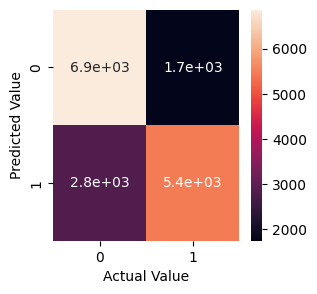

In [24]:
SVMPipeline.fit(xtr,ytr)
cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
scores = cross_val_score(SVMPipeline, xtr, ytr, cv=cv)
y_pred=SVMPipeline.predict(xts)
print("{} Test Acurracy: {}".format(SVMPipeline[1], max(scores)))

print("{} Classification Report:\n {}".format(SVMPipeline[1], classification_report(yts,y_pred)))

print("{} Confusion Matrix:\n {}".format(SVMPipeline[1], confusion_matrix(yts,y_pred)))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(yts,y_pred),annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=4.198875359789924, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=17,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=57, reg_lambda=1, ...) Test Acurracy: 0.733399209486166
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=Non

Text(8.222222222222223, 0.5, 'Predicted Value')

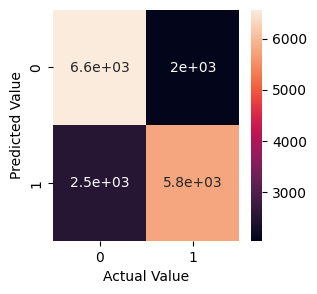

In [25]:
XGBClassifierPipeline.fit(xtr,ytr)
cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
scores = cross_val_score(XGBClassifierPipeline, xtr, ytr, cv=cv)
y_pred=XGBClassifierPipeline.predict(xts)
print("{} Test Acurracy: {}".format(XGBClassifierPipeline[1], max(scores)))

print("{} Classification Report:\n {}".format(XGBClassifierPipeline[1], classification_report(yts,y_pred)))

print("{} Confusion Matrix:\n {}".format(XGBClassifierPipeline[1], confusion_matrix(yts,y_pred)))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(yts,y_pred),annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")



GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           random_state=10, subsample=0.8) Test Acurracy: 0.7355731225296442
GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           random_state=10, subsample=0.8) Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      8608
           1       0.75      0.69      0.72      8259

    accuracy                           0.73     16867
   macro avg       0.73      0.73      0.73     16867
weighted avg       0.73      0.73      0.73     16867

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           random_state=10, subsample=0.8) Confusion Matrix:
 [[6680 1928]
 [2575 568

Text(8.222222222222223, 0.5, 'Predicted Value')

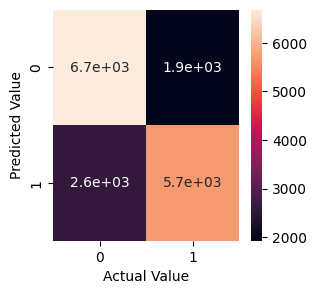

In [26]:
GradientBoostingClassifierPipeline.fit(xtr,ytr)
cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
scores = cross_val_score(GradientBoostingClassifierPipeline, xtr, ytr, cv=cv)
y_pred=GradientBoostingClassifierPipeline.predict(xts)
print("{} Test Acurracy: {}".format(GradientBoostingClassifierPipeline[1], max(scores)))

print("{} Classification Report:\n {}".format(GradientBoostingClassifierPipeline[1], classification_report(yts,y_pred)))

print("{} Confusion Matrix:\n {}".format(GradientBoostingClassifierPipeline[1], confusion_matrix(yts,y_pred)))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(yts,y_pred),annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")



MultinomialNB() Test Acurracy: 0.7077733860342555
MultinomialNB() Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      8608
           1       0.73      0.63      0.68      8259

    accuracy                           0.71     16867
   macro avg       0.71      0.70      0.70     16867
weighted avg       0.71      0.71      0.70     16867

MultinomialNB() Confusion Matrix:
 [[6680 1928]
 [3046 5213]]


Text(8.222222222222223, 0.5, 'Predicted Value')

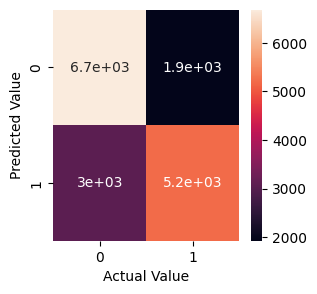

In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtr, ytr)

cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
scores = cross_val_score(model, xtr, ytr, cv=cv)
y_pred=model.predict(xts)
print("{} Test Acurracy: {}".format(model, max(scores)))

print("{} Classification Report:\n {}".format(model, classification_report(yts,y_pred)))

print("{} Confusion Matrix:\n {}".format(model, confusion_matrix(yts,y_pred)))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(yts,y_pred),annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")



ComplementNB() Test Acurracy: 0.7080368906455863
ComplementNB() Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.73      8608
           1       0.72      0.65      0.68      8259

    accuracy                           0.71     16867
   macro avg       0.71      0.70      0.70     16867
weighted avg       0.71      0.71      0.70     16867

ComplementNB() Confusion Matrix:
 [[6568 2040]
 [2927 5332]]


Text(8.222222222222223, 0.5, 'Predicted Value')

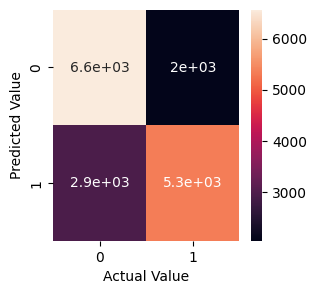

In [28]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(xtr, ytr)

cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
scores = cross_val_score(model, xtr, ytr, cv=cv)
y_pred=model.predict(xts)
print("{} Test Acurracy: {}".format(model, max(scores)))

print("{} Classification Report:\n {}".format(model, classification_report(yts,y_pred)))

print("{} Confusion Matrix:\n {}".format(model, confusion_matrix(yts,y_pred)))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(yts,y_pred),annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")



GaussianNB() Test Acurracy: 0.7170619235836627
GaussianNB() Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.74      8608
           1       0.76      0.62      0.68      8259

    accuracy                           0.72     16867
   macro avg       0.72      0.71      0.71     16867
weighted avg       0.72      0.72      0.71     16867

GaussianNB() Confusion Matrix:
 [[6986 1622]
 [3168 5091]]


Text(8.222222222222223, 0.5, 'Predicted Value')

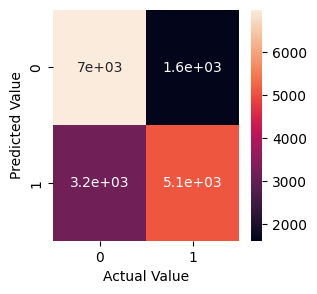

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtr, ytr)

cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
scores = cross_val_score(model, xtr, ytr, cv=cv)
y_pred=model.predict(xts)
print("{} Test Acurracy: {}".format(model, max(scores)))

print("{} Classification Report:\n {}".format(model, classification_report(yts,y_pred)))

print("{} Confusion Matrix:\n {}".format(model, confusion_matrix(yts,y_pred)))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(yts,y_pred),annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")



# Thresholding Classification Modelling

In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score#, specificity_score

# Train the SVM model
svm_model = SVC(gamma="scale",C=5,probability=True)
svm_model.fit(xtr,ytr)

# Make predictions on the test data
y_pred = svm_model.predict(xts)
accuracy = accuracy_score(yts, y_pred)

In [32]:
def classifier(data,threshold):
    y_pred_pat = svm_model.predict(data)

    # Evaluate the model's performance

    #sensitivity = sensitivity_score(yts, y_pred)
    #specificity = specificity_score(yts, y_pred)

    # Present the classifier's output for each test sample
    for i, prediction in enumerate(y_pred_pat):
        probability = svm_model.predict_proba(data)

        if probability[0][prediction] >= threshold and prediction == 1:
            classification_result = "Positive for cardiovascular disorder"
        else:
            classification_result = "Negative for cardiovascular disorder"

        print( f"\nPatient {i + 1}: {classification_result}\n")
        print( f"Probability of cardiovascular disorder: {probability[0][prediction]:.3f}\n")
        print( f"Accuracy: {accuracy:.3f}\n")
        #output += f"Sensitivity: {sensitivity:.3f}\n"
        #output += f"Specificity: {specificity:.3f}\n"

        break

classifier(data=[[60.03835,61,151,67.0,120,80,2,2,0,0,0]],threshold=0.8)


Patient 1: Negative for cardiovascular disorder

Probability of cardiovascular disorder: 0.479

Accuracy: 0.725



C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [35]:
classifier(data=[[61.873973,2,178,95.0,130,90,3,3,0,0,1]],threshold=0.8)


Patient 1: Negative for cardiovascular disorder

Probability of cardiovascular disorder: 0.798

Accuracy: 0.725



C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [29]:
classifier([[55.419178,1,156,85.0,140,90,3,1,0,0,1]],0.8)


Patient 1: Positive for cardiovascular disorder

Probability of cardiovascular disorder: 0.854

Accuracy: 0.725



C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [30]:
classifier([[40.230137,2,171,61.0,110,70,1,1,0,0,1]],0.8)

C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



Patient 1: Negative for cardiovascular disorder

Probability of cardiovascular disorder: 0.867

Accuracy: 0.725



C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Model Saved

In [36]:
import joblib

# Save the trained model
joblib.dump(svm_model, 'model.pkl')

['model.pkl']

In [37]:
# Load the saved model
model = joblib.load('model.pkl')